In [1]:
config Completer.use_jedi = False

In [2]:
from cvae_test import cVAE
import torch
import numpy as np
import mdtraj as md
from utils import voxel_gauss, avg_blob, rigid_transform
from tqdm.notebook import tqdm
import pytorch_lightning as pl
from pathlib import Path

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
#path = 'CLN_params.csv'
#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs/R4/checkpoints/N-Step-Checkpoint.ckpt'
#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_BONDS/R3/checkpoints/N-Step-Checkpoint.ckpt'
#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_v1/R4/checkpoints/N-Step-Checkpoint.ckpt'

#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_final/R1/checkpoints/N-Step-Checkpoint.ckpt'
#hparams_path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs_final/R1/hparams.yaml'

#path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs/R5/checkpoints/N-Step-Checkpoint.ckpt'
path = 'CLN.ckpt'
#hparams_path = '/project2/andrewferguson/Kirill/c2f_vae_final/CLN_logs/R5/hparams.yaml'

In [5]:
#hparams = pl.core.saving.load_hparams_from_tags_csv('CLN_params.csv')

In [6]:
#hparams = pl.core.saving.load_hparams_from_yaml(hparams_path)
model = cVAE.load_from_checkpoint(checkpoint_path=path,map_location=device).to(device)
model.device

device(type='cuda', index=0)

In [7]:
model.setup(None)
model.eval()

Atoms in AA: ['CAY', 'HY1', 'HY2', 'HY3', 'CY', 'OY', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'CE1', 'HE1', 'CZ', 'OH', 'HH', 'CD2', 'HD2', 'CE2', 'HE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'CE1', 'HE1', 'CZ', 'OH', 'HH', 'CD2', 'HD2', 'CE2', 'HE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'OD1', 'OD2', 'C', 'O', 'N', 'CD', 'HD3', 'HD2', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'HG3', 'HG2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'HG3', 'HG2', 'CD', 'OE1', 'OE2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'OG1', 'HG1', 'CG2', 'HG21', 'HG22', 'HG23', 'C', 'O', 'N', 'H', 'CA', 'HA3', 'HA2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'OG1', 'HG1', 'CG2', 'HG21', 'HG22', 'HG23', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'HD1', 'NE1', 'HE1', 'CE2', 'CD2', 'CE3', 'HE3', 'CZ3', 'HZ3', 'CZ2', 'HZ2', 'CH2', 'HH2', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB3', 'HB2', 'CG', 'CD1', 'H

cVAE(
  (encoder): Encoder(
    (featurizer): Sequential(
      (0): Conv3d(360, 32, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(2, 2, 2))
      (1): GroupNorm(1, 32, eps=1e-05, affine=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Residual3DConvBlock(
        (downsample): Identity()
        (block): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): GroupNorm(1, 32, eps=1e-05, affine=True)
          (2): LeakyReLU(negative_slope=0.01)
          (3): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (4): GroupNorm(1, 32, eps=1e-05, affine=True)
        )
        (nonlin): LeakyReLU(negative_slope=0.01)
      )
      (4): Residual3DConvBlock(
        (downsample): Sequential(
          (0): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (1): Conv3d(32, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
        )
        (block): Sequenti

In [8]:
model.hparams

"E_mu":                          504.8884
"E_std":                         48.551476
"aa_pdb":                        AA.pdb
"aa_traj":                       AA.dcd
"batch_size":                    32
"beta":                          1.0
"bonds_edm_weight":              1.0
"cg_coord_weight":               1.0
"cg_pdb":                        CG.pdb
"cg_traj":                       CG.dcd
"coord_weight":                  1.0
"default_save_path":             None
"energy_loss_after_n_steps":     750000
"energy_loss_clamp":             True
"energy_loss_gradient_clip_val": 0.1
"energy_weight_anneal_steps":    1250000
"energy_weight_end":             1.0
"energy_weight_start":           1e-06
"fac_decoder":                   8
"fac_encoder":                   16
"hallucinate_every_n_epochs":    5
"latent_dim":                    64
"learning_gamma":                1.0
"learning_rate":                 0.00042333235887203046
"length":                        5.5
"log_path":                  

In [ ]:
z, Energies = model.estimate_latent_space_density()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import pearsonr
sns.set(style='white')

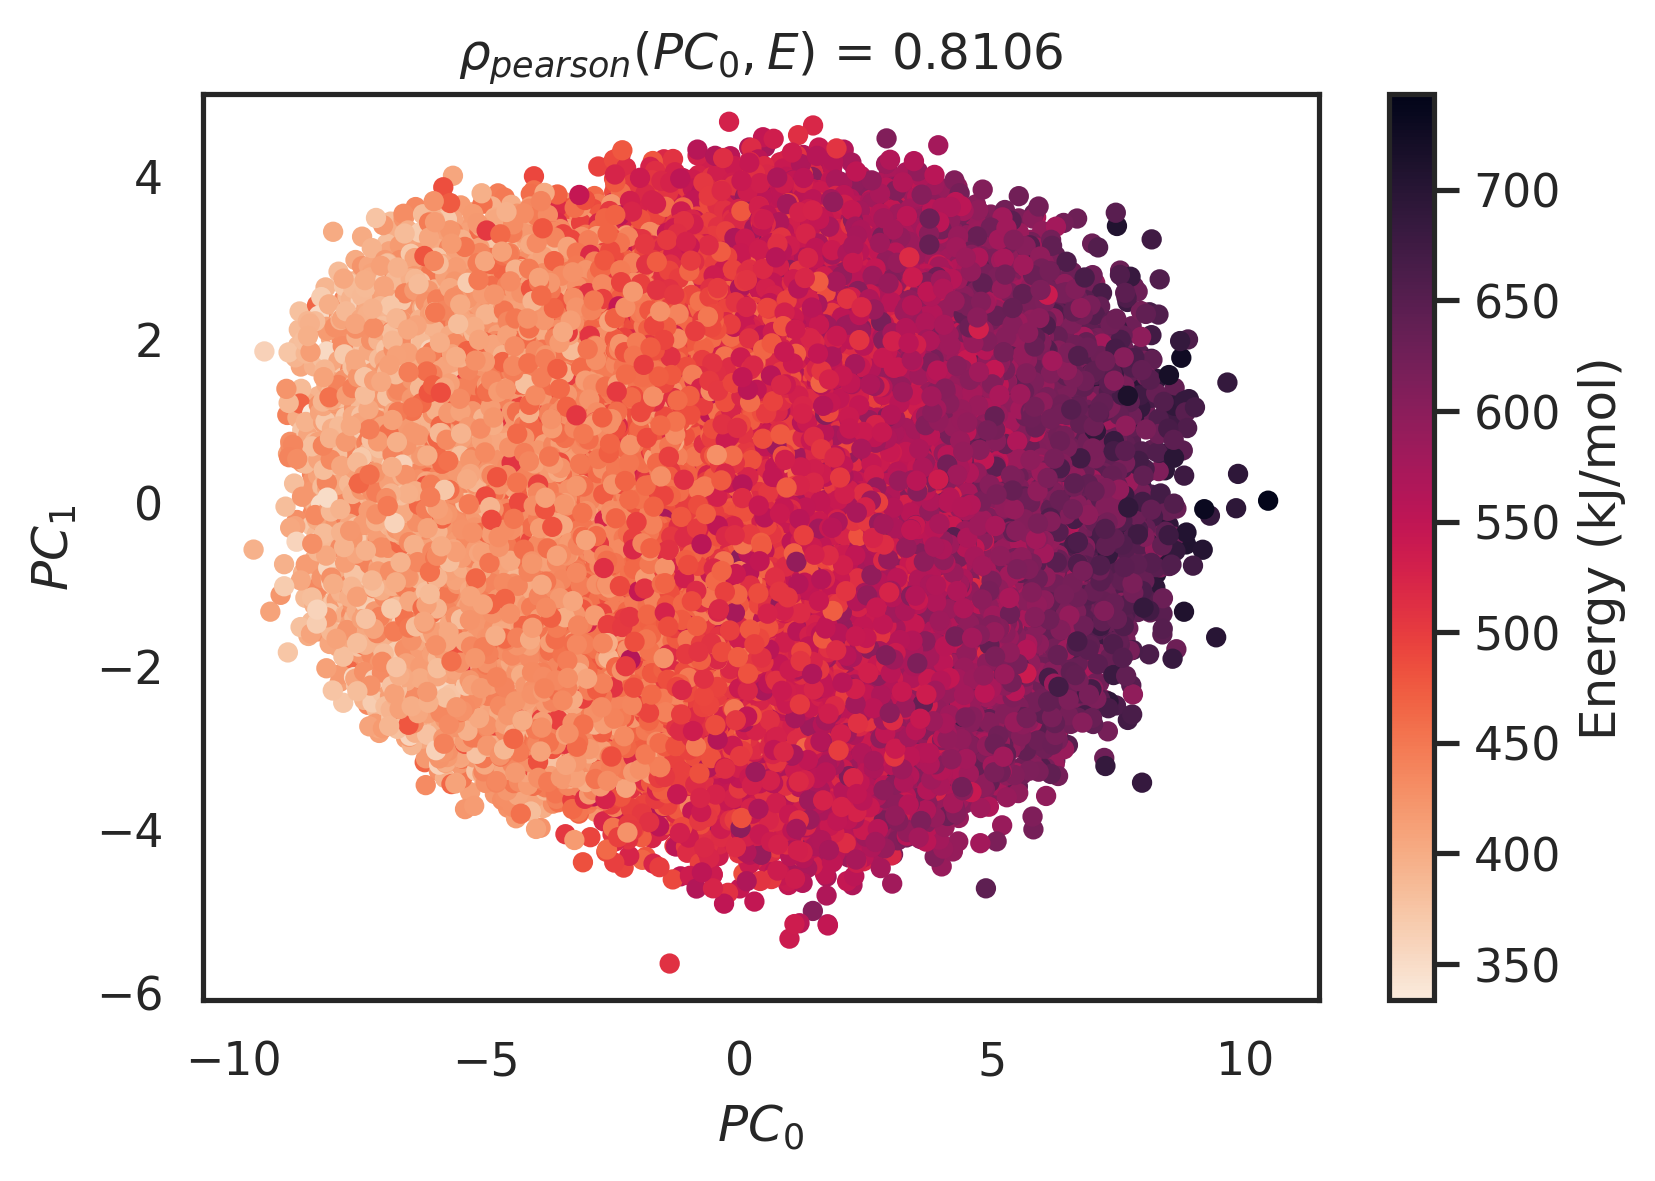

In [15]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)
plt.figure(dpi=300)
cmap = ListedColormap(sns.color_palette("rocket_r", n_colors=256).as_hex())
im = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=Energies.flatten(), cmap=cmap, s=15)
plt.colorbar(im, orientation='vertical', label='Energy (kJ/mol)')
plt.title("$\\rho_{pearson}(PC_0, E)$ = " + f'{pearsonr(z_pca[:, 0], Energies.flatten())[0]:.4g}')
plt.xlabel('$PC_0$')
plt.ylabel('$PC_1$')
plt.ylim(-6.1, 5)
plt.show() #0.7261, 0.7691 for BONDS, 

In [12]:
import joblib
#joblib.dump(model.GMM, "CLN_GMM.pkl") 

In [13]:
model.GMM = joblib.load('CLN_GMM.pkl')
model.GMM

GaussianMixture(n_components=10)

In [38]:
traj_list = sorted(list(Path('CLN_CGSET').glob('cln*fold_0*.npy')))
cg_data = []
for name in traj_list:
    sub_traj = np.load(name) / 10.0 # (Here I convert to nm for easy VMD/NGLview usage)
    cg_data.append(sub_traj)
cg_data = np.concatenate(cg_data, axis=1)
cg_data.shape

(50, 100000, 10, 3)

In [39]:
cg_data = cg_data[:, ::25, ...]
cg_data.shape

(50, 4000, 10, 3)

In [40]:
n_train = int(len(model.aa_trajs) * model.hparams.train_percent)

In [41]:
def hallucinate(cg_test, name_num):
    cg_test_trj = md.Trajectory(cg_test, topology=model.cg_traj.top).center_coordinates()
    cg_test_data = cg_test_trj.xyz

    for i, cg_traj in tqdm(enumerate(model.cg_trajs[:n_train]), total=len(model.cg_trajs[:n_train]), leave=False):
        if i == 0:
            aa_trj_min = 0
            best_min = np.inf
            continue
        else:
            rmsd_min = md.rmsd(cg_traj, cg_test_trj, frame=0).min()
            if rmsd_min < best_min:
                aa_trj_min = i
                best_min = rmsd_min
                aa_argmin = md.rmsd(cg_traj, cg_test_trj, frame=0).argmin()

    aa_0 = model.aa_trajs[:n_train][aa_trj_min][aa_argmin]
    R, t = rigid_transform(aa_0.atom_slice(model.cg_idxs).xyz[0], cg_test_trj.xyz[0])
    aa_0 = model.aa_trajs[:n_train][aa_trj_min][aa_argmin - 1]
    aa_0.xyz = aa_0.xyz @ R + t

    with torch.no_grad():
        aa_vox_current = voxel_gauss(
            torch.Tensor(aa_0[0].xyz).to(model.device),
            res=model.hparams.resolution,
            width=model.hparams.length,
            sigma=model.hparams.sigma,
            device=model.device)

        fake_coords = list()
        for i in tqdm(range(cg_test_trj.n_frames), leave=False):
            cg_vox = voxel_gauss(
                torch.Tensor(cg_test_trj[i].xyz).to(model.device),
                res=model.hparams.resolution,
                width=model.hparams.length,
                sigma=model.hparams.sigma,
                device=model.device)

            condition = torch.cat((cg_vox, aa_vox_current), dim=1)
            
            z = model.sample_GMM_latent_space()

            recon_aa_vox = model.decode(z, condition)

            aa_fake = avg_blob(
                recon_aa_vox,
                res=model.hparams.resolution,
                width=model.hparams.length,
                sigma=model.hparams.sigma,
                device=model.device,
            )
            aa_fake = aa_fake - aa_fake.mean(dim=1)
            fake_coords.append(aa_fake)

            aa_vox_current = voxel_gauss(
                aa_fake,
                res=model.hparams.resolution,
                width=model.hparams.length,
                sigma=model.hparams.sigma,
                device=model.device)

    hallucinate_coords = torch.cat(fake_coords, dim=0)
    hallucinate_trj = md.Trajectory(hallucinate_coords.detach().cpu().numpy(), topology=model.aa_traj.top).center_coordinates()
    hallucinate_trj.save_dcd(f'CLN_cg2aa_hallucinate/hallucinated_{name_num}.dcd')
    cg_test_trj.save_dcd(f'CLN_cg2aa_hallucinate/CG_{name_num}.dcd')
    #aa_test_trj.save_dcd(f'CLN_cg2aa_hallucinate/AA_{name_num}.dcd')

In [42]:
for i, cg in tqdm(enumerate(cg_data), total=cg_data.shape[0]):
    hallucinate(cg, i)